In [107]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [99]:

url = "https://opendata.arcgis.com/datasets/7826a3ef2eff4d64a7f70e909de007b5_0.geojson"

In [100]:
homicide_data = requests.get(url).json()
type(homicide_data)

dict

In [19]:
len(homicide_data)

2

In [20]:
homicide_data.keys()

dict_keys(['type', 'features'])

In [21]:
len(homicide_data['features'])

919

In [28]:


#list of features required
hom_div=[]
hom_Unique_ID =[]
hom_type= []
neighbourhood_ID =[]
neighbourhood_name = []
occurance_date=[]
occurance_year=[]
lat_long= []
FID=[]
Index=[]

In [24]:
#pprint(homicide_data['features'][i])

NameError: name 'i' is not defined

In [29]:
for i in range(len(homicide_data['features'])):
    hom_div.append(homicide_data['features'][i]['properties']['Division'])
    hom_Unique_ID.append(homicide_data['features'][i]['properties']['Event_Unique_ID'])
    hom_type.append(homicide_data['features'][i]['properties']['Homicide_Type'])
    neighbourhood_ID.append(homicide_data['features'][i]['properties']['Hood_ID'])
    neighbourhood_name.append(homicide_data['features'][i]['properties']['Neighbourhood'])
    occurance_date.append(homicide_data['features'][i]['properties']['Occurrence_Date'])
    occurance_year.append(homicide_data['features'][i]['properties']['Occurrence_year'])
    lat_long.append(homicide_data['features'][i]['geometry']['coordinates'])
    
    FID.append(homicide_data['features'][i]['properties']['FID'])
    Index.append(homicide_data['features'][i]['properties']['Index_'])

In [119]:
homicide_dict ={
    'Event Unique ID':hom_Unique_ID,
    'Division':hom_div,
    'Homicide Type': hom_type,
    'hood_id':neighbourhood_ID,
    'Neighbourhood Name': neighbourhood_name,
    'Occurance Date': occurance_date,
    'Occurance year': occurance_year,
    'coordinates':lat_long,
    'FID': FID,
    'Index':Index
        
}

In [120]:
homicide_df = pd.DataFrame(homicide_dict)
homicide_df

,Event Unique ID,Division,Homicide Type,hood_id,Neighbourhood Name,Occurance Date,Occurance year,coordinates,FID,Index
0,3737551,D43,Other,136,West Hill (136),2011-01-06T05:00:00.000Z,2011,"[-79.1947403, 43.76201629999999]",1,437
1,4040426,D53,Other,95,Annex (95),2011-01-12T05:00:00.000Z,2011,"[-79.3966064, 43.6747284]",2,438
2,4033175,D13,Other,102,Forest Hill North (102),2011-01-13T05:00:00.000Z,2011,"[-79.43849950000002, 43.704624200000005]",3,439
3,3832781,D51,Other,74,North St.James Town (74),2011-01-23T05:00:00.000Z,2011,"[-79.3783493, 43.6662865]",4,440
4,3713412,D12,Shooting,30,Brookhaven-Amesbury (30),2010-02-07T05:00:00.000Z,2010,"[-79.50260929999999, 43.69842150000001]",5,441
5,3966773,D31,Shooting,21,Humber Summit (21),2011-02-01T05:00:00.000Z,2011,"[-79.5490723, 43.7506523]",6,442
6,3530271,D31,Stabbing,27,York University Heights (27),2011-02-05T05:00:00.000Z,2011,"[-79.4875946, 43.74961089999999]",7,443
7,4017505,D12,Shooting,112,Beechborough-Greenbrook (112),2011-02-11T05:00:00.000Z,2011,"[-79.4832687, 43.69341279999999]",8,444
8,3948450,D43,Shooting,137,Woburn (137),2011-02-11T05:00:00.000Z,2011,"[-79.221199, 43.7596092]",9,445
9,4017400,D12,Shooting,113,Weston (113),2011-02-16T05:00:00.000Z,2011,"[-79.5094604, 43.69730379999999]",10,446


In [121]:
division_count=homicide_df.groupby("Division")['Event Unique ID'].count()

In [122]:
Neighbourhood_count= homicide_df.groupby(["hood_id","Neighbourhood Name"])['Event Unique ID'].count()

In [123]:
#Neighbourhood_count.columns.values.tolist()
homicide_per_hood=Neighbourhood_count.reset_index()
homicide_new=homicide_per_hood.rename(columns={"Event Unique ID":"Homicide Counts"})
a=homicide_new.sort_values(by=['Homicide Counts'],ascending = False)
#total_homicide=homicide_per_hood["Event unique ID"]
homicide_new




,hood_id,Neighbourhood Name,Homicide Counts
0,1,West Humber-Clairville (1),12
1,2,Mount Olive-Silverstone-Jamestown (2),25
2,3,Thistletown-Beaumond Heights (3),3
3,4,Rexdale-Kipling (4),4
4,5,Elms-Old Rexdale (5),8
5,6,Kingsview Village-The Westway (6),12
6,7,Willowridge-Martingrove-Richview (7),3
7,8,Humber Heights-Westmount (8),6
8,10,Princess-Rosethorn (10),1
9,11,Eringate-Centennial-West Deane (11),4


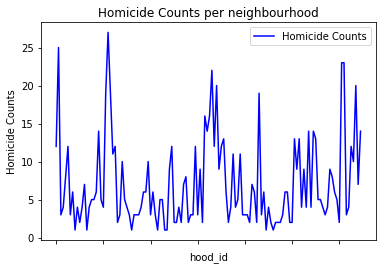

In [124]:
bar_plot=homicide_new.plot(kind='line',x='Neighbourhood Name',y='Homicide Counts',color='b')
plt.xlabel('hood_id')
plt.ylabel('Homicide Counts')
plt.title('Homicide Counts per neighbourhood')
#perc_acc.set_xticklabels(acc_final['accloc'],rotation=45)
#year_graph.set_xticks(x_axis.values,minor=True)
#perc_acc.legend(self.labels,colorList[:len(self.labels)])

#plt.gcf().subplots_adjust(bottom=0.5)
plt.savefig('Homicide per Neighbourhood',bbox_inches="tight")

In [125]:
Homicide_Type= homicide_df.groupby("Homicide Type")['Event Unique ID'].count()
Homicide_Type

Homicide Type
Other       238
Shooting    475
Stabbing    206
Name: Event Unique ID, dtype: int64

In [126]:
# Import CSV for merging
income_file = "Desktop\Matplotlib\incomefile.csv"
income_pd=pd.read_csv(income_file)
income_pd.head()
income_df=pd.DataFrame(income_pd).round(2)
income_df.head()


,hood_id,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Average Income
0,"11,082,118,150,330,600,000,000.00",NaN,NaN,NaN,NaN,NaN,NaN
1,2,1048.0,217.0,140.0,387.0,14.0,26815.0
2,3,225.0,62.0,86.0,92.0,10.0,32880.5
3,4,285.0,83.0,62.0,75.0,4.0,34970.5
4,5,246.0,59.0,56.0,78.0,5.0,31303.5


In [141]:
# Merging on hood ID
homicide_new.convert_objects(convert_numeric=True)
income_df.convert_objects(convert_numeric=True)
merged_df= pd.merge(homicide_new[["hood_id","Homicide Counts"]],income_df[["hood_id","Average Income"]] , on = ["hood_id"], how="left")

C:\Intel\New folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Intel\New folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat